#DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/train-chennai-sale.csv')
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7108 non-null   float64       
 6   N_BATHROOM     7104 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

DEALING WITH NULL VALUES

In [3]:
print('Duplicates present in data: ', df.duplicated().sum())
print("As we have corrected the datatypes and there are no null/duplicate values anymore, we can proceed for data pre-processing.")

Duplicates present in data:  0
As we have corrected the datatypes and there are no null/duplicate values anymore, we can proceed for data pre-processing.


#DATA ENGINEERING

In [4]:
df['AGE'] = df.DATE_SALE - df.DATE_BUILD
df.AGE = df.AGE.dt.components.days

In [5]:
df.drop('PRT_ID',axis=1,inplace=True)

In [6]:
df['MZZONE'] = df['MZZONE'].str.lower()
df.MZZONE.value_counts()

rl    1858
rh    1822
rm    1817
c      550
a      537
i      525
Name: MZZONE, dtype: int64

In [7]:
df['AREA'] = df['AREA'].str.lower()
df['AREA'] = df['AREA'].str.replace('chrompet','chromepet')
df['AREA'] = df['AREA'].str.replace('chrompt','chromepet')
df['AREA'] = df['AREA'].str.replace('chrmpet','chromepet')
df['AREA'] = df['AREA'].str.replace('chormpet','chromepet')
df['AREA'] = df['AREA'].str.replace('chormpet','chromepet')

df['AREA'] = df['AREA'].str.replace('ann nagar','anna nagar')
df['AREA'] = df['AREA'].str.replace('ana nagar','anna nagar')

df['AREA'] = df['AREA'].str.replace('tnagar','t nagar')
df['AREA'] = df['AREA'].str.replace('kknagar','kk nagar')
df['AREA'] = df['AREA'].str.replace('karapakam','karapakkam')
df['AREA'] = df['AREA'].str.replace('adyr','adyar')
df['AREA'] = df['AREA'].str.replace('velchery','velachery')
df.AREA.value_counts()

chromepet     1702
karapakkam    1366
kk nagar       997
velachery      981
anna nagar     788
adyar          774
t nagar        501
Name: AREA, dtype: int64

In [8]:
df['PARK_FACIL'] = df['PARK_FACIL'].str.lower()
df['PARK_FACIL'] = df['PARK_FACIL'].str.replace('noo','no')
df['PARK_FACIL'] = df['PARK_FACIL'].map({'yes':1,'no':0})
df.PARK_FACIL.value_counts()

1    3587
0    3522
Name: PARK_FACIL, dtype: int64

In [9]:
df['SALE_COND'] = df['SALE_COND'].str.lower()
df['SALE_COND'] = df['SALE_COND'].str.replace('partiall','partial')
df['SALE_COND'] = df['SALE_COND'].str.replace('ab normal','abnormal')
df['SALE_COND'] = df['SALE_COND'].str.replace('adj land','adjland')
df.SALE_COND.value_counts()

adjland        1439
partial        1433
normal sale    1423
abnormal       1411
family         1403
Name: SALE_COND, dtype: int64

In [10]:
df['STREET'] = df['STREET'].str.lower()
df['STREET'] = df['STREET'].str.replace('pavd','paved')
df['STREET'] = df['STREET'].str.replace('noaccess','no access')
df.STREET.value_counts()

paved        2572
gravel       2520
no access    2017
Name: STREET, dtype: int64

In [11]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.lower()
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.replace('all pub','allpub')
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.replace('nosewr','nosewer')
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.replace('nosewa','nosewer')
# df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.replace('nosewer','nosewer')
df.UTILITY_AVAIL.value_counts()

allpub      1887
nosewer     1871
nosewer     1829
elo         1522
Name: UTILITY_AVAIL, dtype: int64

In [12]:
df['BUILDTYPE'] = df['BUILDTYPE'].str.lower()
df['BUILDTYPE'] = df['BUILDTYPE'].str.replace('other','others')
df['BUILDTYPE'] = df['BUILDTYPE'].str.replace('otherss','others')
df['BUILDTYPE'] = df['BUILDTYPE'].str.replace('comercial','commercial')
df.BUILDTYPE.value_counts()

house         2444
others        2336
commercial    2329
Name: BUILDTYPE, dtype: int64

#EDA

In [13]:
# corr = df.corr()
# fig, ax = plt.subplots(figsize=(40, 40))
# sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
# plt.xticks(range(len(corr.columns)), corr.columns);
# plt.yticks(range(len(corr.columns)), corr.columns)
# plt.show()

In [14]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE'],
      dtype='object')

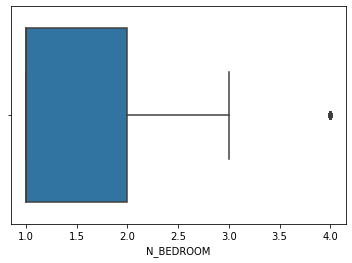

In [15]:
sns.boxplot(x=df.N_BEDROOM)

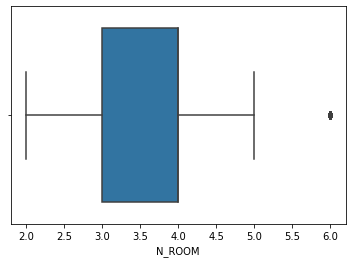

In [16]:
sns.boxplot(x=df.N_ROOM)

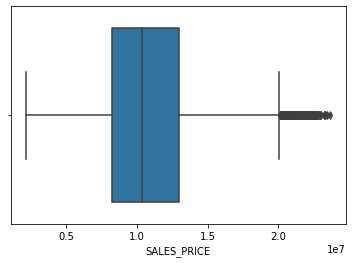

In [17]:
sns.boxplot(x=df.SALES_PRICE)

In [18]:
# sns.barplot(y=sort_values(by=/df.AREA, x=df.SALES_PRICE)
# ye vaaaaaaaaalaaaaa...........do lable encoding for area cat col

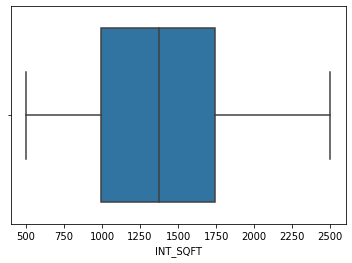

In [19]:
sns.boxplot(x=df.INT_SQFT)

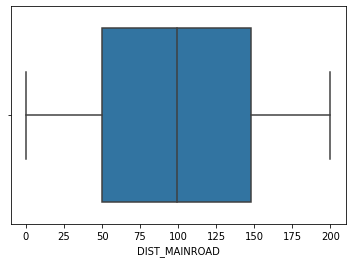

In [20]:
sns.boxplot(x=df.DIST_MAINROAD)

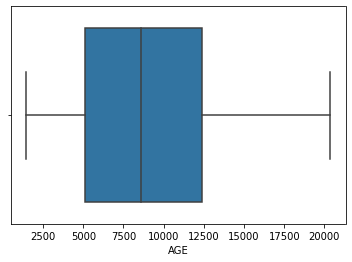

In [21]:
sns.boxplot(x=df.AGE)

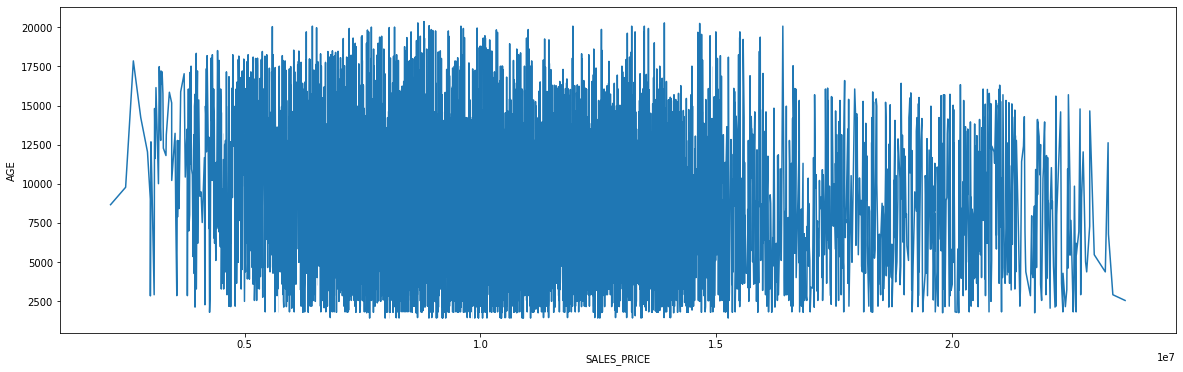

In [22]:
plt.figure(figsize=(20,6)) 
sns.lineplot(y=df.AGE, x=df.SALES_PRICE)
plt.show()

In [23]:
# sns.

In [24]:
# sns.barplot(x=df.SALES_PRICE, y=df.PARK_FACIL.any())

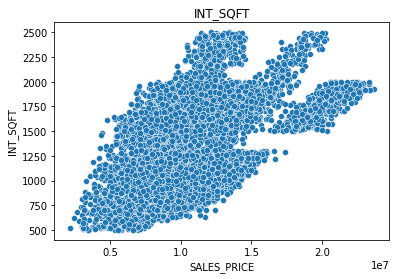

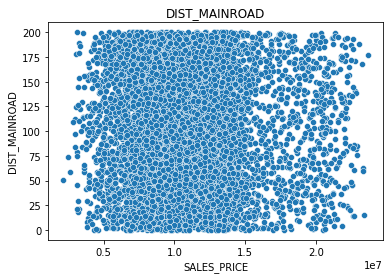

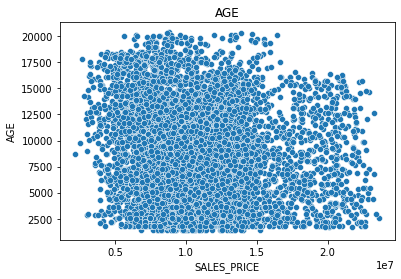

In [25]:
col1 = ['INT_SQFT', 'DIST_MAINROAD', 'AGE']

col2 = ['oh_adyar','oh_anna nagar', 'oh_chromepet', 'oh_karapakkam', 'oh_kk nagar']
      #  'oh_t nagar', 'oh_velachery', 'oh_abnormal', 'oh_adjland', 'oh_family',
      #  'oh_normal sale', 'oh_partial', 'oh_commercial',
      #  'oh_house', 'oh_others', 'oh_allpub', 'oh_elo', 'oh_nosewer',
      #  'oh_nosewer ', 'oh_gravel', 'oh_no access', 'oh_paved', 'oh_a', 'oh_c',
      #  'oh_i', 'oh_rh', 'oh_rl', 'oh_rm', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
      #  'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM']

col3 = ['PARK_FACIL', 'PARK_FACIL']

for i in col1:
  sns.scatterplot(x=df['SALES_PRICE'],y=df[i])
  plt.title(i)
  plt.show()

In [26]:
# for i in col2:
#   sns.scatterplot(x=df['SALES_PRICE'],y=(df[i]))
#   plt.title(i)
#   plt.show()

#Seperate

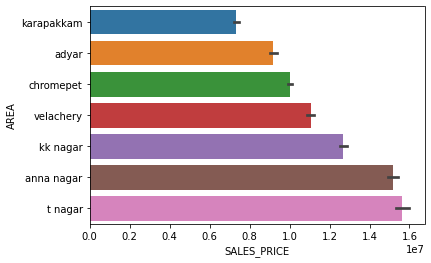

In [27]:
dff=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(y=df.AREA,x=df.SALES_PRICE,order=dff)

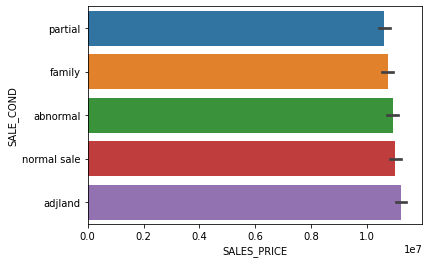

In [28]:
dff = pd.DataFrame()
dff=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(y=df.SALE_COND,x=df.SALES_PRICE,order=dff)

In [29]:

# sns.boxplot(y=df.PARK_FACIL,x=df.SALES_PRICE)

In [35]:
#OBJECT TYPES
oh1 = pd.get_dummies(df[['AREA']],prefix='oh')       #label
oh2 = pd.get_dummies(df[['SALE_COND']],prefix='oh')  #label
oh3 = pd.get_dummies(df[['PARK_FACIL']],prefix='oh')
oh4 = pd.get_dummies(df[['BUILDTYPE']],prefix='oh')
oh5 = pd.get_dummies(df[['UTILITY_AVAIL']],prefix='oh')
oh6 = pd.get_dummies(df[['STREET']],prefix='oh')
oh7 = pd.get_dummies(df[['MZZONE']],prefix='oh')
# INTEGER TYPES
int1 = pd.get_dummies(df[['N_BEDROOM']],prefix='oh')
int2 = pd.get_dummies(df[['N_BATHROOM']],prefix='oh')
int3 = pd.get_dummies(df[['N_ROOM']],prefix='oh')
#EXPERIMENTAL
exp1 = pd.get_dummies(df[['QS_ROOMS']],prefix='oh')
exp2 = pd.get_dummies(df[['QS_BATHROOM']],prefix='oh')
exp3 = pd.get_dummies(df[['QS_BEDROOM']],prefix='oh')

In [36]:
model_df = pd.DataFrame()
model_df = df[['AREA', 'INT_SQFT', 'DIST_MAINROAD','PARK_FACIL','AGE']].copy()
model_df = pd.concat([model_df,oh1,oh2,oh3,oh4,oh5,oh6,oh7,int1,int2,int3,exp1,exp2,exp3],axis=1)
model_df['SALES_PRICE'] = df['SALES_PRICE'].copy()
model_df.shape
#Imputing leftover null values with mode
model_df.N_BEDROOM = model_df.N_BEDROOM.fillna(model_df.N_BEDROOM.mode()[0])
model_df.N_BATHROOM = model_df.N_BATHROOM.fillna(model_df.N_BATHROOM.mode()[0])

In [37]:
#oh_kk nagar has very low corr still included.
# X = model_df[['INT_SQFT','oh_anna nagar','oh_karapakkam','oh_kk nagar','oh_t nagar','oh_commercial',\
#                       'oh_house','oh_others','oh_a','oh_c','oh_rm','N_BEDROOM','N_ROOM']].values
X = model_df[['INT_SQFT', 'DIST_MAINROAD', 'PARK_FACIL', 'AGE', 'oh_adyar',
       'oh_anna nagar', 'oh_chromepet', 'oh_karapakkam', 'oh_kk nagar',
       'oh_t nagar', 'oh_velachery', 'oh_abnormal', 'oh_adjland', 'oh_family',
       'oh_normal sale', 'oh_partial', 'PARK_FACIL', 'oh_commercial',
       'oh_house', 'oh_others', 'oh_allpub', 'oh_elo', 'oh_nosewer',
       'oh_nosewer ', 'oh_gravel', 'oh_no access', 'oh_paved', 'oh_a', 'oh_c',
       'oh_i', 'oh_rh', 'oh_rl', 'oh_rm', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM']]
y = model_df['SALES_PRICE']

In [38]:
import statsmodels.api as sm
XX=sm.add_constant(X)
model = sm.OLS(y,X)

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     5049.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:15:53   Log-Likelihood:            -1.0646e+05
No. Observations:                7109   AIC:                         2.130e+05
Df Residuals:                    7076   BIC:                         2.132e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
INT_SQFT        3892.7172     85.612     45.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**SPLITTING**

In [39]:
X = X.values
y = y.values

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**SCALING**

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##EXPERIMENT SECTION

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7108 non-null   float64       
 5   N_BATHROOM     7104 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   int64         
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

NEURAL

RANDOM

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor(n_estimators = 350, random_state = 2)
rf_regressor.fit(X_train, y_train)

cv_rf = cross_val_score(estimator = rf_regressor, X = X_train, y = y_train, cv = 10)

y_pred_rf_train = rf_regressor.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_regressor.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.981937884299005
R2_score (train):  0.9976963552756158
R2_score (test):  0.9844018412278479
RMSE:  474763.45284167555


LINEAR

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

steps = [
          ('poly', PolynomialFeatures(degree=2)),
          ('model', LinearRegression(fit_intercept=True))
        ]

lin_regressor = Pipeline(steps)
lin_regressor.fit(X_train, y_train)

#Applying Cross validation on train data
cv_line_regressor = cross_val_score(estimator = lin_regressor, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_linear_train = lin_regressor.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = lin_regressor.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE on the Test set results
rmse_lin_regressor = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print('CV: ', cv_line_regressor.mean())
print('R2_score (train): {}  ------------> {}%'.format(r2_score_linear_train,r2_score_linear_train*100))
print('R2_score (test) : {}  ------------> {}%'.format(r2_score_linear_test,r2_score_linear_test*100))
print("RMSE: ", rmse_lin_regressor)

CV:  0.9997516978182619
R2_score (train): 0.9997994385075515  ------------> 99.97994385075515%
R2_score (test) : 0.9997325560172992  ------------> 99.97325560172992%
RMSE:  62166.58728668816


RIDGE

In [45]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

steps = [
          ('poly', PolynomialFeatures(degree=2)),
          ('model', Ridge(alpha=.02, fit_intercept=True))
        ]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

#Applying Cross validation on train data
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): {}  ------------> {}%'.format(r2_score_ridge_train,r2_score_ridge_train*100))
print('R2_score (test) : {}  ------------> {}%'.format(r2_score_ridge_test,r2_score_ridge_test*100))
print("RMSE: ", rmse_ridge)

CV:  0.9997546654655277
R2_score (train): 0.9998012973194849  ------------> 99.98012973194848%
R2_score (test) : 0.9997345237414346  ------------> 99.97345237414346%
RMSE:  61937.46915550675


LASSO

In [46]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

steps = [
          ('poly', PolynomialFeatures(degree=2)),
          ('model', Lasso(alpha=0.013, fit_intercept=True, max_iter=3000))
        ]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): {}  ------------> {}%'.format(r2_score_lasso_train,r2_score_lasso_train*100))
print('R2_score (test) : {}  ------------> {}%'.format(r2_score_lasso_test,r2_score_lasso_test*100))
print("RMSE: ", rmse_lasso)

CV:  0.9997526224710673
R2_score (train): 0.9998000152670653  ------------> 99.98000152670653%
R2_score (test) : 0.9997292129127026  ------------> 99.97292129127025%
RMSE:  62553.928127094885


GRADIENT BOOST REG

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

predicted = gbr.predict(X_test)
expected = y_test
cv_gbr = cross_val_score(estimator = gbr, X = X_train, y = y_train, cv = 10)
y_pred_gbr_train = gbr.predict(X_train)
r2_score_gbr_train = r2_score(y_train, y_pred_gbr_train)

# Predicting R2 Score the Test set results
y_pred_gbr_test = gbr.predict(X_test)
r2_score_gbr_test = r2_score(y_test, y_pred_gbr_test)

# Predicting RMSE the Test set results
rmse_gbr = (np.sqrt(mean_squared_error(y_test, y_pred_gbr_test)))
print('CV: ', cv_gbr.mean())
print('R2_score (train): ', r2_score_gbr_train)
print('R2_score (test): ', r2_score_gbr_test)
print("RMSE: ", rmse_gbr)
gbr.score(X_test,y_test)

CV:  0.9888586100559668
R2_score (train):  0.990293217653726
R2_score (test):  0.9885751047471185
RMSE:  406318.6200592893


0.9885751047471185

DECISION TREE

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
regressor_dt = DecisionTreeRegressor(max_depth=4, random_state = 0)
regressor_dt.fit(X_train, y_train)


# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.843566658881783
R2_score (train):  0.8484226553648417
R2_score (test):  0.8515606117385022
RMSE:  1464587.0485291218


XGB


In [49]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np

xgb_regressor = xgb.XGBRegressor(learning_rate =.11, n_estimators=100, verbosity = 0, random_state=0) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model
xgb_regressor.score(X_test, y_test) # scoring the model - r2 squared
xgbr_cross_val_score = np.mean(cross_val_score(xgb_regressor, X_train, y_train, cv=10))
print("Learning rate : ", .11)

y_pred_xgbr_train = xgb_regressor.predict(X_train)
r2_score_xgbr_train = r2_score(y_train, y_pred_xgbr_train)

y_pred_xgbr_test = xgb_regressor.predict(X_test)
r2_score_xgbr_test = r2_score(y_test, y_pred_xgbr_test)

rmse_xgbr = (np.sqrt(mean_squared_error(y_test, y_pred_xgbr_test)))
print('CV: ', xgbr_cross_val_score)
print('R2_score (train): ', r2_score_xgbr_train)
print('R2_score (test): ', r2_score_xgbr_test)
print("RMSE: ", rmse_xgbr)

Learning rate :  0.11
CV:  0.9901008945718358
R2_score (train):  0.9925389500438355
R2_score (test):  0.9910500255171465
RMSE:  359626.3539100665


In [50]:
models = [('Linear Regression', rmse_lin_regressor, r2_score_linear_train, r2_score_linear_test, cv_line_regressor.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          # ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()),
          ('GB Regression', rmse_gbr, r2_score_gbr_train, r2_score_gbr_test, cv_gbr.mean()),
          ('XGB Regression', rmse_xgbr, r2_score_xgbr_train, r2_score_xgbr_test, xgbr_cross_val_score)   
         ]
Table = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
Table

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,6.216659e+04,0.999799,0.999733,0.999752
1,Ridge Regression,6.193747e+04,0.999801,0.999735,0.999755
2,Decision Tree Regression,1.464587e+06,0.848423,0.851561,0.843567
3,Random Forest Regression,4.747635e+05,0.997696,0.984402,0.981938
4,GB Regression,4.063186e+05,0.990293,0.988575,0.988859
5,XGB Regression,3.596264e+05,0.992539,0.991050,0.990101
